<a href="https://colab.research.google.com/github/sam2005-max/Classically_punk/blob/main/classically_punk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classicaly punk blog post on Medium.com

In [ ]:
#blog post -> https://medium.com/@xamidovs005/classically-punk-d9683e6664b4

# Classically punk project code

In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import IPython
import IPython.display as ipd
import librosa
import librosa.display 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    

In [ ]:
def load_dataset():
  return pd.read_csv("/content/sample_data/features_3_sec (2).csv")
data = load_dataset()
data

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [ ]:
def information_of_data(data):
  print(data.info())
information_of_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [ ]:
def null_values_on_the_data():
  print(data.isnull().sum())
null_values_on_the_data()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [ ]:
def shape_of_data(data):
  print(data.shape)
shape_of_data(data)

(9990, 60)


In [ ]:
audio_files = glob("/content/sample_data/blues.00002.wav")
ipd.Audio(audio_files[0])

In [ ]:
y, sr = librosa.load(audio_files[0])
print("Y is a numpy array:", y)
print("Shape of Y:", y.shape)
print("Sample Rate:", sr)

Y is a numpy array: [ 0.01901245  0.04769897  0.02941895 ...  0.01318359 -0.0663147
 -0.12484741]
Shape of Y: (661794,)
Sample Rate: 22050


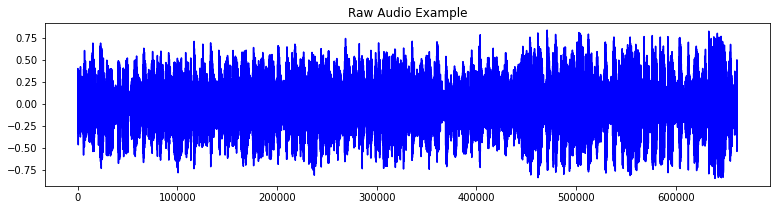

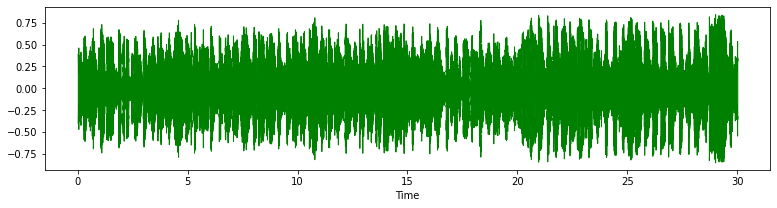

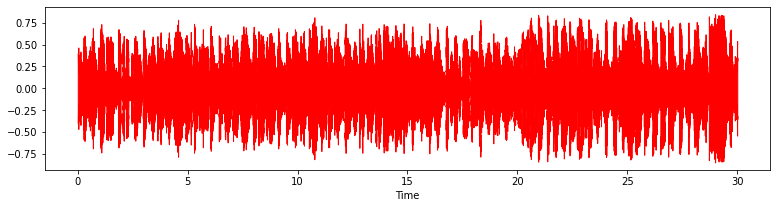

In [ ]:
def audio_vizualing(y):
  pd.Series(y).plot(figsize=(13,3), title="Raw Audio Example", color='blue')
  plt.figure(figsize=(13,3))
  librosa.display.waveshow(y, color = "Green")
  plt.show()
  plt.figure(figsize=(13,3))
  librosa.display.waveshow(y, color = "red")
  plt.show()
audio_vizualing(y)

In [ ]:
D = librosa.stft(y)
# convert from aplitude to decibel values by taking the absolute value of D in reference what the max value would be
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# see the shape of transformed data
print("New shape of transformed data", S_db.shape)

New shape of transformed data (1025, 1293)


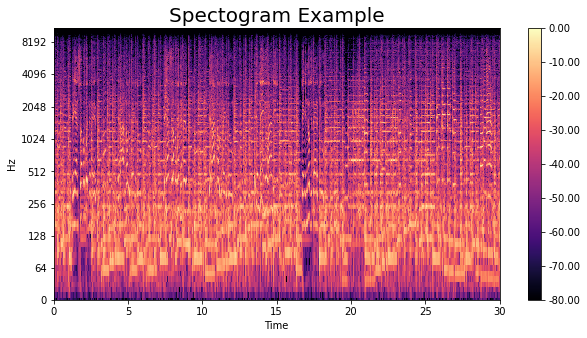

In [ ]:
def spectogram_example(S_db):
  fig, ax = plt.subplots(figsize=(10,5))
  img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
  ax.set_title('Spectogram Example', fontsize=20)
  fig.colorbar(img, ax=ax, format=f'%0.2f');
spectogram_example(S_db)

In [ ]:
def shape(y):
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128*2)
  print("Shape of Mel Spectogram", S.shape)
  # use that converting function as above
  S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
  return S_db_mel
S_db_mel = shape(y)

Shape of Mel Spectogram (256, 1293)


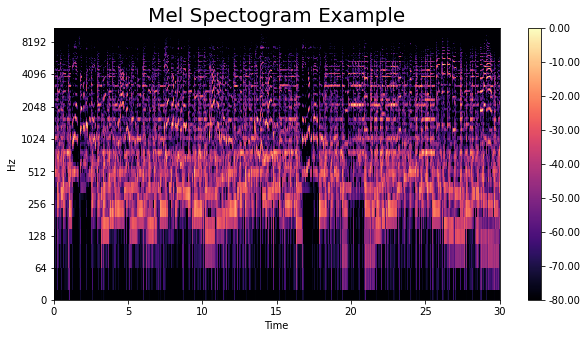

In [ ]:
def mel_spectogram_example(S_db_mel):
  fig, ax = plt.subplots(figsize=(10,5))
  img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
  ax.set_title('Mel Spectogram Example', fontsize=20)
  fig.colorbar(img, ax=ax, format=f'%0.2f');
mel_spectogram_example(S_db_mel)

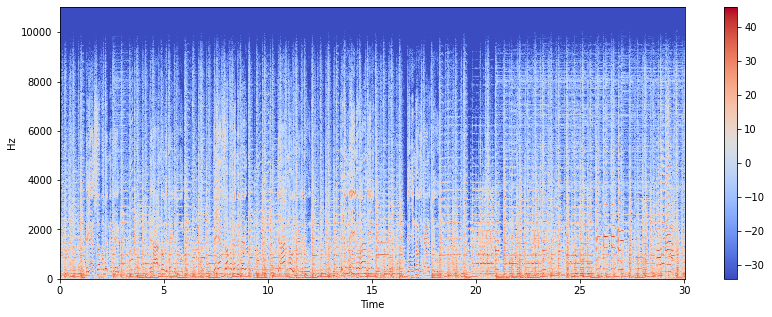

In [ ]:
def spectogram_1(y):
  X = librosa.stft(y)
  Xdb = librosa.amplitude_to_db(abs(X))
  plt.figure(figsize=(14, 5))
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()
  return Xdb
Xdb = spectogram_1(y)

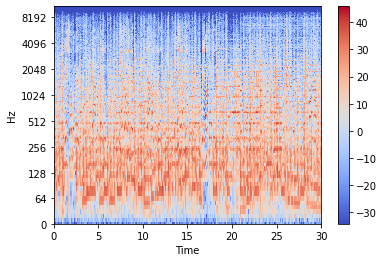

In [ ]:
def spectogram_2(Xdb):
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar()
spectogram_2(Xdb)

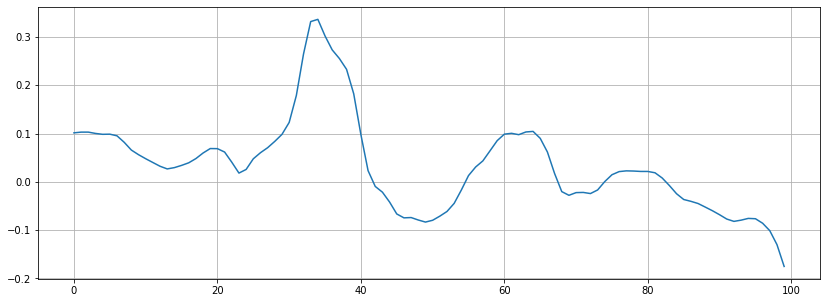

In [ ]:
def visualing_figure(y):
  n0 = 9000
  n1 = 9100
  plt.figure(figsize=(14, 5))
  plt.plot(y[n0:n1])
  plt.grid()
visualing_figure(y)


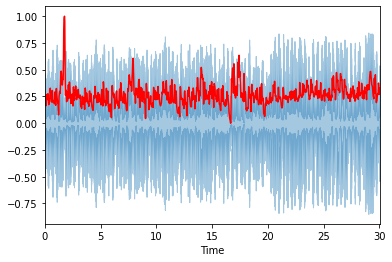

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

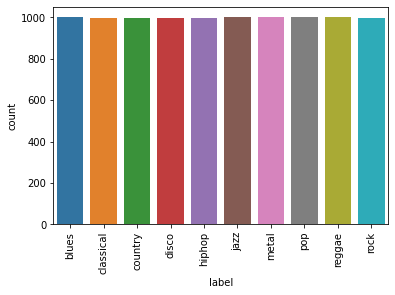

In [ ]:
def plot_the_categories(data):
  sns.countplot(x=data.label) 
  plt.xticks(rotation=90)
plot_the_categories(data)

In [ ]:
df = data.drop(labels='filename',axis=1)
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
encoder = LabelEncoder()
scaler = StandardScaler()

In [ ]:
data = df.iloc[:, :-1] 
data.head(5)

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694


In [ ]:
labels = df.iloc[:, -1]
labels.to_frame()

,label
0,blues
1,blues
2,blues
3,blues
4,blues
...,...
9985,rock
9986,rock
9987,rock
9988,rock


In [ ]:
def classically_punk_fit_model_prediction(data,labels):
  x = np.array(data, dtype = float)
  x = scaler.fit_transform(data)
  y = encoder.fit_transform(labels)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 20)
  g=GaussianNB()
  b=BernoulliNB()
  KN=KNeighborsClassifier()
  D=DecisionTreeClassifier()
  XGB=XGBClassifier()
  algos=[g,b,KN,D,XGB]
  algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier','XGBClassifier']
  accuracy_scored=[]
  for item in algos:
      item.fit(x_train,y_train)
      item.predict(x_test)
      accuracy_scored.append(f"{round(accuracy_score(y_test,item.predict(x_test))*100)}%")
  result = pd.DataFrame(accuracy_scored, columns=["Accuracy"])
  result['Algos']=algo_names
  print(result.sort_values('Accuracy',ascending=False))
classically_punk_fit_model_prediction(data,labels)

  Accuracy                   Algos
2      89%    KNeighborsClassifier
4      79%           XGBClassifier
3      65%  DecisionTreeClassifier
0      52%              GaussianNB
1      49%             BernoulliNB
